# DFN model for sodium-ion batteries

In this notebook we use the DFN model to simulate sodium-ion batteries. The parameters are based on the article
> K. Chayambuka, G. Mulder, D.L. Danilov, P.H.L. Notten, Physics-based modeling of sodium-ion batteries part II. Model and validation, Electrochimica Acta 404 (2022) 139764. https://doi.org/10.1016/j.electacta.2021.139764.

However, the specific values (including the data for the interpolants) are taken from the COMSOL implementation presented in [this example](https://www.comsol.com/model/1d-isothermal-sodium-ion-battery-117341). As usual, we start by importing PyBaMM.

In [1]:
import pybamm

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


We now need to define the model. In this case we take the `BasicDFN` model for sodium-ion batteries (note how it is called from the `pybamm.sodium_ion` submodule). Note that, at the moment, the model is identical to the one for lithium-ion batteries, but uses different parameter values.

In [2]:
model = pybamm.sodium_ion.BasicDFN()

In order to replicate the results in the COMSOL example, we discharge at different C-rates and compare the solutions. We loop over the C-rate dictionary and solve the model for each C-rate. We append the solutions into a list so we can later plots the results.

In [3]:
C_rates = [1 / 12, 5 / 12, 10 / 12, 1]
solutions = []

for C_rate in C_rates:
    sim = pybamm.Simulation(model, solver=pybamm.IDAKLUSolver(), C_rate=C_rate)
    sol = sim.solve([0, 4000 / C_rate])
    solutions.append(sol)

pybamm.dynamic_plot(solutions)

interactive(children=(FloatSlider(value=0.0, description='t', max=10.809166247210616, step=0.10809166247210616…

We can now perform a manual plot of voltage versus capacity, to compare the results with the COMSOL example.

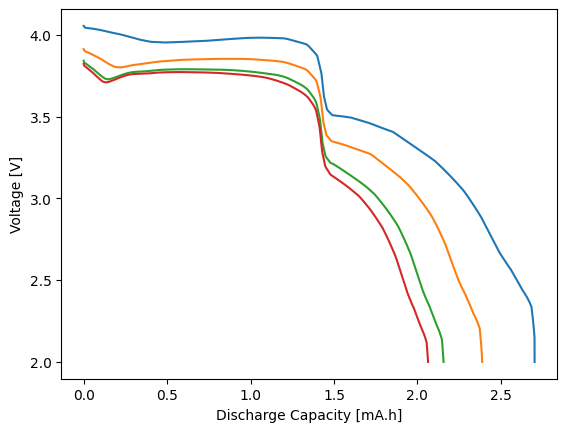

In [4]:
import matplotlib.pyplot as plt

for solution, C_rate in zip(solutions, C_rates):
    capacity = [i * 1000 for i in solution["Discharge capacity [A.h]"].entries]
    voltage = solution["Voltage [V]"].entries
    plt.plot(capacity, voltage, label=f"{(12 * C_rate)} A.m-2")

plt.xlabel("Discharge Capacity [mA.h]")
plt.ylabel("Voltage [V]");

In [5]:
pybamm.print_citations()

[1] Joel A. E. Andersson, Joris Gillis, Greg Horn, James B. Rawlings, and Moritz Diehl. CasADi – A software framework for nonlinear optimization and optimal control. Mathematical Programming Computation, 11(1):1–36, 2019. doi:10.1007/s12532-018-0139-4.
[2] Kudakwashe Chayambuka, Grietus Mulder, Dmitri L Danilov, and Peter HL Notten. Physics-based modeling of sodium-ion batteries part ii. model and validation. Electrochimica Acta, 404:139764, 2022.
[3] Charles R. Harris, K. Jarrod Millman, Stéfan J. van der Walt, Ralf Gommers, Pauli Virtanen, David Cournapeau, Eric Wieser, Julian Taylor, Sebastian Berg, Nathaniel J. Smith, and others. Array programming with NumPy. Nature, 585(7825):357–362, 2020. doi:10.1038/s41586-020-2649-2.
[4] Alan C. Hindmarsh. The PVODE and IDA algorithms. Technical Report, Lawrence Livermore National Lab., CA (US), 2000. doi:10.2172/802599.
[5] Alan C. Hindmarsh, Peter N. Brown, Keith E. Grant, Steven L. Lee, Radu Serban, Dan E. Shumaker, and Carol S. Woodward. S